<a href="https://colab.research.google.com/github/virf96/Basico/blob/main/Hello_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
df = pd.DataFrame(data = iris["data"], columns=iris["feature_names"])
df["target"] = iris["target"]
tgt = "target"
ls_features = [x for x in df.columns if x not in [tgt]]

In [3]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
df['target'].value_counts(1)

2    0.333333
1    0.333333
0    0.333333
Name: target, dtype: float64

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df[ls_features]
y = df[tgt]

In [7]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=5)

In [8]:
from sklearn.naive_bayes import GaussianNB

In [10]:
model=GaussianNB()

In [11]:
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [12]:
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix,f1_score

def metricas(model,Xv,yv): #Mide efectividad de un Modelo Predictivo
    print( " Acc Validate: %.3f" %accuracy_score(y_pred=model.predict(Xv),y_true=yv))
    print( " Matrix Conf Validate: ", "\n",confusion_matrix(y_pred=model.predict(Xv),y_true=yv))

In [13]:
metricas(model, X_test,y_test)

 Acc Validate: 0.921
 Matrix Conf Validate:  
 [[12  0  0]
 [ 0 13  1]
 [ 0  2 10]]


In [14]:
f1_score( y_test,model.predict(X_test),average='weighted')

0.9206975459638602

## Ejemplo 2

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
dataset = pd.read_csv('/content/drive/MyDrive/datasets/Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [19]:
X_ = dataset.iloc[:, [2, 3]]
y_ = dataset.iloc[:, -1]

In [20]:
X_

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [21]:
from sklearn.model_selection import train_test_split
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size = 0.25, random_state = 0)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_ = sc.fit_transform(X_train_)
X_test_ = sc.transform(X_test_)

In [24]:
classifier = GaussianNB()
classifier.fit(X_train_, y_train_)

GaussianNB(priors=None, var_smoothing=1e-09)

In [25]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


In [26]:
y_pred_ = classifier.predict(X_test_)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test_, y_pred_)
print(cm)
accuracy_score(y_test_, y_pred_)

[[65  3]
 [ 7 25]]


0.9

In [28]:
import matplotlib.pyplot as plt

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


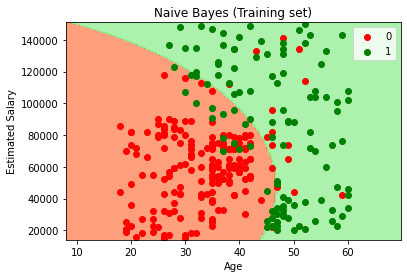

In [29]:
#  Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train_), y_train_
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('coral', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


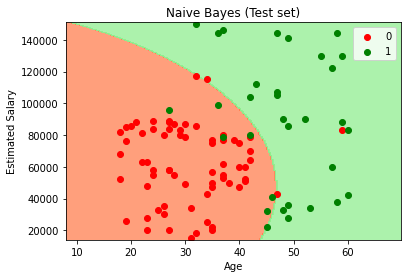

In [ ]:
# Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test_), y_test_
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('coral', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()